In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = data

In [4]:
df.shape

(891, 12)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe().T.round(0)

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.0,257.0,1.0,224.0,446.0,668.0,891.0
Survived,891.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0
Age,714.0,30.0,15.0,0.0,20.0,28.0,38.0,80.0
SibSp,891.0,1.0,1.0,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0
Fare,891.0,32.0,50.0,0.0,8.0,14.0,31.0,512.0


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df['Age'].isna().sum()

177

In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
df['Age'].count()

891

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [16]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250


In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [18]:
(df['Age']==0).sum()

0

In [19]:
df['Sex']=pd.Categorical(df['Sex']).codes

In [20]:
df.dtypes

Survived      int64
Pclass        int64
Sex            int8
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [21]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [22]:
X=df.drop('Survived',axis=1)
y=df.pop('Survived')

In [23]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [24]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)


In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

ytrain_pred= dt_model.predict(X_train)
ytest_pred = dt_model.predict(X_test)

In [27]:

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [28]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=10,min_samples_split=30)

In [29]:
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=10, min_samples_split=30)

In [30]:
train_char_label = ['No', 'Yes']
reg_Tree_File= open('reg_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=reg_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

reg_Tree_File.close()

[Text(428.83333333333337, 1026.8, 'X[1] <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(206.66666666666669, 906.0, 'X[0] <= 2.5\ngini = 0.393\nsamples = 220\nvalue = [59, 161]'),
 Text(124.0, 785.2, 'X[5] <= 141.077\ngini = 0.083\nsamples = 115\nvalue = [5, 110]'),
 Text(82.66666666666667, 664.4, 'X[2] <= 37.0\ngini = 0.056\nsamples = 105\nvalue = [3, 102]'),
 Text(41.333333333333336, 543.6, 'gini = 0.0\nsamples = 74\nvalue = [0, 74]'),
 Text(124.0, 543.6, 'X[5] <= 26.125\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(82.66666666666667, 422.79999999999995, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(165.33333333333334, 422.79999999999995, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(165.33333333333334, 664.4, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(289.33333333333337, 785.2, 'X[5] <= 7.888\ngini = 0.5\nsamples = 105\nvalue = [54, 51]'),
 Text(248.0, 664.4, 'gini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(330.6666666666667, 664.4,

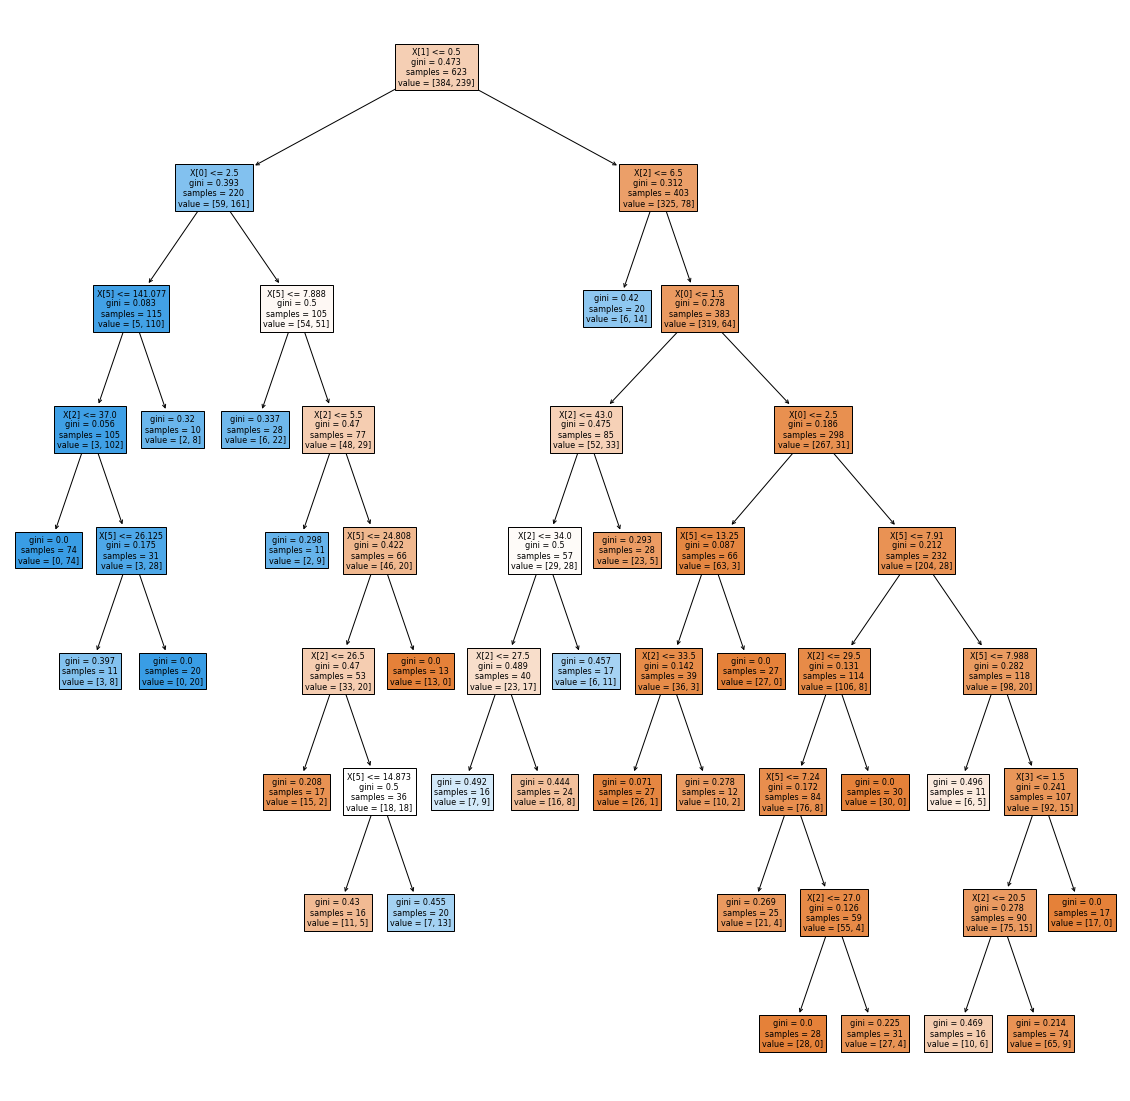

In [31]:
plt.figure(figsize=(20,20))
tree.plot_tree(reg_dt_model,filled=True)

In [32]:
feature_imp = pd.DataFrame(reg_dt_model.feature_importances_,columns=['Imp'],index=X_train.columns)
feature_imp

,Imp
Pclass,0.216766
Sex,0.502151
Age,0.172328
SibSp,0.004837
Parch,0.000000
Fare,0.103918


<AxesSubplot:>

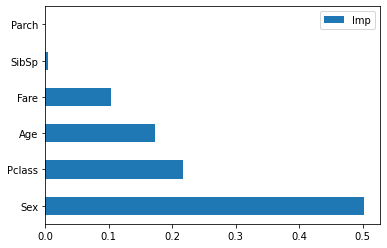

In [33]:
#feature_imp.sort_values(ascending=False).plot(kind = 'barh')
feature_imp.sort_values(ascending=False,by=['Imp']).plot(kind = 'barh')

In [34]:
ytrain_pred1 = reg_dt_model.predict(X_train)
ytest_pred1 = reg_dt_model.predict(X_test)

In [35]:
ytrain_pred2 = reg_dt_model.predict_proba(X_train)
ytest_pred2 = reg_dt_model.predict_proba(X_test)

In [36]:
# predict probabilities for train dataset
probs_train = reg_dt_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
probs_train

array([1.        , 0.        , 0.        , 0.12162162, 0.7       ,
       0.12162162, 0.375     , 0.5625    , 0.45454545, 1.        ,
       1.        , 0.12162162, 0.12162162, 0.16666667, 0.7       ,
       0.12162162, 0.03703704, 0.375     , 0.12162162, 0.3125    ,
       0.        , 0.7       , 0.33333333, 1.        , 0.16      ,
       1.        , 0.64705882, 0.        , 1.        , 0.12162162,
       0.12162162, 0.65      , 0.        , 0.72727273, 0.12162162,
       0.11764706, 1.        , 0.        , 0.33333333, 0.17857143,
       0.12162162, 0.        , 0.17857143, 0.17857143, 1.        ,
       0.8       , 0.78571429, 0.03703704, 0.33333333, 1.        ,
       1.        , 0.12162162, 0.        , 0.17857143, 0.16666667,
       0.        , 0.78571429, 0.        , 0.7       , 1.        ,
       0.17857143, 0.12903226, 0.45454545, 0.16666667, 0.5625    ,
       0.        , 0.        , 0.64705882, 1.        , 0.12162162,
       0.11764706, 0.        , 0.        , 1.        , 1.     

In [37]:
# calculating auc for train dataset using probabilities
auc_train = roc_auc_score(y_train,probs_train)
print('AUC: %.3f' %auc_train)

AUC: 0.923


In [38]:
# predicting probabilities for test dataset
probs_test  = reg_dt_model.predict_proba(X_test)
probs_test = probs_test[:,1]
probs_test

array([0.16      , 0.03703704, 0.        , 0.78571429, 0.33333333,
       0.16666667, 0.12162162, 0.78571429, 1.        , 0.12903226,
       0.03703704, 0.        , 1.        , 0.8       , 0.12903226,
       0.16      , 0.11764706, 0.45454545, 0.16      , 0.375     ,
       0.64705882, 0.        , 1.        , 0.11764706, 1.        ,
       0.78571429, 0.12162162, 0.        , 0.375     , 0.12162162,
       0.17857143, 0.72727273, 0.        , 0.17857143, 0.78571429,
       0.16      , 0.12903226, 1.        , 0.        , 0.16      ,
       0.33333333, 0.        , 0.17857143, 0.8       , 0.12162162,
       0.17857143, 0.        , 0.        , 0.11764706, 0.        ,
       1.        , 0.11764706, 0.        , 0.03703704, 0.        ,
       0.78571429, 0.33333333, 0.3125    , 1.        , 0.        ,
       0.16      , 1.        , 0.12162162, 1.        , 0.8       ,
       0.78571429, 0.        , 1.        , 0.12162162, 0.        ,
       0.12162162, 0.78571429, 0.12162162, 1.        , 0.17857

In [39]:
# calculate AUC for test dataset

auc_test = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc_test)


AUC: 0.773


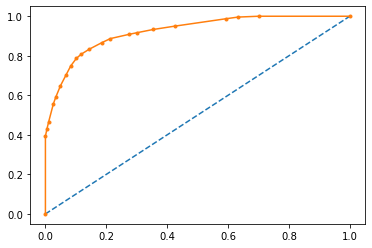

In [40]:
# calculate roc curve for train dataset

fpr, tpr, thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

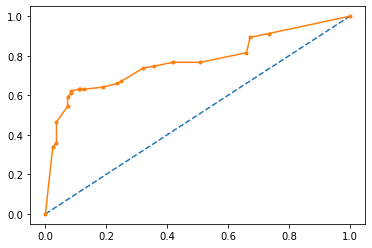

In [41]:
# calculate roc curve for test dataset

fpr1, tpr1, thresholds1 = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr1, tpr1, marker='.')

# show the plot
plt.show()

In [42]:
print(classification_report(y_train,ytrain_pred1))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       384
           1       0.83      0.79      0.81       239

    accuracy                           0.86       623
   macro avg       0.85      0.84      0.85       623
weighted avg       0.85      0.86      0.85       623



In [43]:
print(classification_report(y_test,ytest_pred1))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       165
           1       0.77      0.63      0.70       103

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [44]:
confusion_matrix(y_train,ytrain_pred1)

array([[345,  39],
       [ 51, 188]], dtype=int64)

In [45]:
# printing confision matrix
pd.DataFrame(confusion_matrix(y_train,ytrain_pred1),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,345,39
Survived,51,188


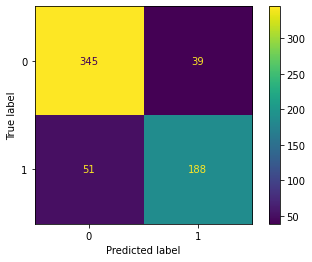

In [46]:
plot_confusion_matrix(reg_dt_model,X_train,y_train)

In [47]:
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,ytest_pred1),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,146,19
Survived,38,65


In [48]:
confusion_matrix(y_test,ytest_pred1)


array([[146,  19],
       [ 38,  65]], dtype=int64)

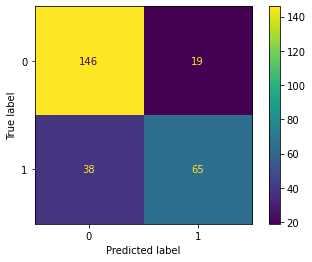

In [49]:
plot_confusion_matrix(reg_dt_model,X_test,y_test)

In [50]:
reg_dt_model.score(X_train,y_train)

0.85553772070626

In [51]:
reg_dt_model.score(X_test,y_test)

0.7873134328358209

# Using ccp_alphas hyperparameter on dt.model to prune the model & check the accuracy score


In [53]:
path = dt_model.cost_complexity_pruning_path(X_train,y_train)

In [54]:
ccp_alpha = path.ccp_alphas

In [55]:
dt_model2=[]
for ccp in ccp_alpha:
    dt_m= DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)

In [56]:
train_score = [i.score(X_train,y_train) for i in dt_model2]

In [57]:
test_score = [i.score(X_test,y_test) for i in dt_model2]

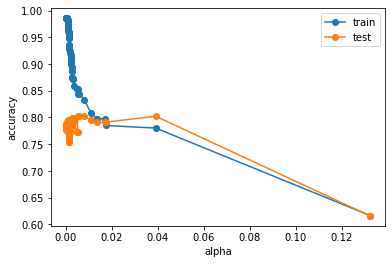

In [59]:
fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alpha,train_score,marker='o',label = 'train')
ax.plot(ccp_alpha,test_score,marker='o',label = 'test')
ax.legend()

In [65]:
dt_model_ccp = DecisionTreeClassifier(ccp_alpha=0.0191)

In [67]:
dt_model_ccp.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0191)

In [68]:
dt_model_ccp.score(X_train,y_train)

0.7849117174959872

In [69]:
dt_model_ccp.score(X_test,y_test)

0.7910447761194029

[Text(200.88000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 2.5\ngini = 0.393\nsamples = 220\nvalue = [59, 161]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.083\nsamples = 115\nvalue = [5, 110]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 105\nvalue = [54, 51]'),
 Text(267.84000000000003, 108.72, 'gini = 0.312\nsamples = 403\nvalue = [325, 78]')]

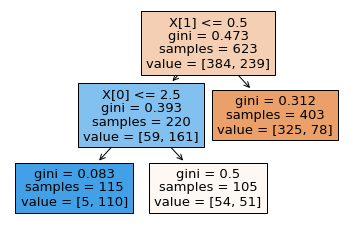

In [70]:
tree.plot_tree(dt_model_ccp,filled=True)